<a href="https://colab.research.google.com/github/LagosJA/Mineria_de_Datos/blob/main/Ejercicios_Tecnicas_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Técnicas de Minería

Equipo 1

Grupo 002 Miércoles 7-10 PM

Integrantes:


*   1851448 Muñoz Barrientos Regina
*   1941592 Lagos Martinez José Alejandro
*   1793775 Rodriguez Guerrero Luisa Victoria
*   1849202 Dominguez Victorino Cesar Oswaldo



In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.tools import add_constant
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

df = pd.read_csv("heart.csv")
df = pd.read_csv("heart.csv",encoding='utf8')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
df.columns = ['Edad','Sexo','DolorPecho','PresArtRep','Col','NivAzuAyu','Electro','MaxRitCard','Angina','MinElectro','Pendiente','NumVasSang','thal','Objetivo']
df.head()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
df=df.drop(df[df['NumVasSang'] == 4].index)
df=df.drop(df[df['thal'] == 0].index)

### Regresión Logística

Lo primero que hacemos, y nos va a servir para todas las técnicas, es separar la variable objetivo de las que usaremos para modelar. Además se van a crear los modelos con el 80% de los datos y usaremos el otro 20% para hacer una prueba.

In [127]:
X = df.drop(['Objetivo'],axis=1) 
y = df['Objetivo'] 

Aquí hacemos el split, las variables train son con las que entrenaremos al modelo y usaremos los perfiles test para comparar la predicción del modelo con el resultado real.

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

Como este es un modelo de regresión, debemos agregar el término connstante.

In [76]:
model = LogisticRegression(solver='liblinear')
X_train = add_constant(X_train)

Con `.fit` obtenemos el modelo.

In [119]:
model.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Con `.predict` podemos ver las predicciones que hace el modelo de regresión logística.

In [78]:
train_pred = model.predict(X_train)
train_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

El training score es el ajuste del modelo.

In [132]:
Training_score = accuracy_score(train_pred,y_train) 
print("LR Accuracy Training Score: {:.2f}%".format(Training_score*100))

LR Accuracy Training Score: 87.29%


In [120]:
X_train = add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330387
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Objetivo   No. Observations:                  236
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                           13
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.5225
Time:                        17:52:29   Log-Likelihood:                -77.971
converged:                       True   LL-Null:                       -163.28
Covariance Type:            nonrobust   LLR p-value:                 1.386e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7438      2.894      0.948      0.343      -2.928       8.415
Edad           0.0059      0.

Podemos realizar predicciones para el conjunto que no se usó para entrenar al modelo.

In [134]:
test_pred = model.predict(X_test)
test_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

Ahora obtenemos el accuracy score de los resultados reales vs los resultados del modelo.

In [133]:
Test_score = accuracy_score(test_pred,y_test) 
print("LR Accuracy Test Score: {:.2f}%".format(Test_score*100))

LR Accuracy Test Score: 88.33%


En general vemos que tanto los datos con los que se construyó el modelo y los que se usaron para test, tienen buen ajuste. 

El p-valor de 1.386e-29 es menor a alfa=0.05. Podemos decir que con 95% de confianza, la regresión es significativa.

De la tabla resumen vemos que el intervalo de confianza de la const contiene al 0, lo que es un indicio de regresión al origen. En general, los modelos de regresión tienden a mejorar su ajuste.

**Regresión al Origen, es decir cte=0.**

Realizamos los mismos pasos que para la regresión anterior, esta vez excluyendo el `add_constant`.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())
test_pred = model.predict(X_test)
Training_score = accuracy_score(train_pred,y_train) 
print("LR Accuracy Training Score: {:.2f}%".format(Training_score*100))
Test_score = accuracy_score(test_pred,y_test) 
print("LR Accuracy Test Score: {:.2f}%".format(Test_score*100))

Optimization terminated successfully.
         Current function value: 0.332312
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Objetivo   No. Observations:                  236
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           12
Date:                Wed, 13 Oct 2021   Pseudo R-squ.:                  0.5197
Time:                        18:36:28   Log-Likelihood:                -78.426
converged:                       True   LL-Null:                       -163.28
Covariance Type:            nonrobust   LLR p-value:                 5.489e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Edad           0.0200      0.022      0.907      0.364      -0.023       0.063
Sexo          -1.2468      0.

Vemos que el ajuste del modelo, tanto como el accuracy score para los datos test permanecen igual que en la regresión anterior.

Como no hubo mejoras es indiferente cual modelo elegimos. Para regresión al orgien el p-valor=5.489e-30 por lo que también podemos concluir con un 95% de confianza que la regresión es significativa.

Nos quedaremos con el modelo que tiene regresión al origen.

Como el ajuste es mayor a 80% decimos que es un buen modelo. La ecuación del modelo es la siguiente. Aquí (p/1-p) se conoce como "odd ratio". Cuando el logaritmo del "odd ratio" es positivo, la probabilidad de éxtito (enfermdad del corazón) es mayor a 50%. Y ese perfil se clasifica como Objetivo=1 es decir padece enfermedad del corazón.


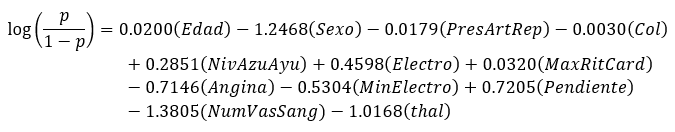

El coeficiente de sexo es negativo, lo que indica que cuando el paciente es hombre (Sexo=1) el log(p/1-p) decrece por lo que es más probable que sea negativo y el diagnóstico sea 0. Es decir que las mujeres son más propensas a ser diagnosticadas con enfermedades del corazón. 

Lo mismo ocurre con el coeficiente de NumVasSang, como este es negativo entre más vasos sanguíneos sean visibles menor es la expresión log(p/1-p), y si log(p/1-p) es negativo esto significa que el diagnostico es 0. Es decir que entre menos vasos sanguíneos son visibles en el paciente, mayor es la probabilidad de que este padezca de una enfermedad del corazón.

### Arbol de Decisón

La programación para este modelo es más sencilla ya que en la técnica anterior hicimos el split.

In [153]:
dtc = DecisionTreeClassifier( max_depth=3, min_samples_leaf=2)
dtc.fit(X_train, y_train)

print("Decision Tree Train Accuracy {:.2f}%".format(dtc.score(X_train, y_train)*100))
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Decision Tree Train Accuracy 86.44%
Decision Tree Test Accuracy 80.00%


Imprimimos algunos perfiles que se usaron para test y sus respectivas predicciones por si queremos trazar el camino que seguimos al utilizar el árbol de decisión. 

In [115]:
X_test.head(10)

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2


In [141]:
preds

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

Ahora visualicemos el árbol de decisión.

In [97]:
export_graphviz(dtc, 'tree1.dot', filled=True, feature_names=X_train.columns, rounded=True)
!dot -Tpng 'tree1.dot' -o  'tree1.png'
!ls

heart.csv  sample_data	tree1.dot  tree1.png


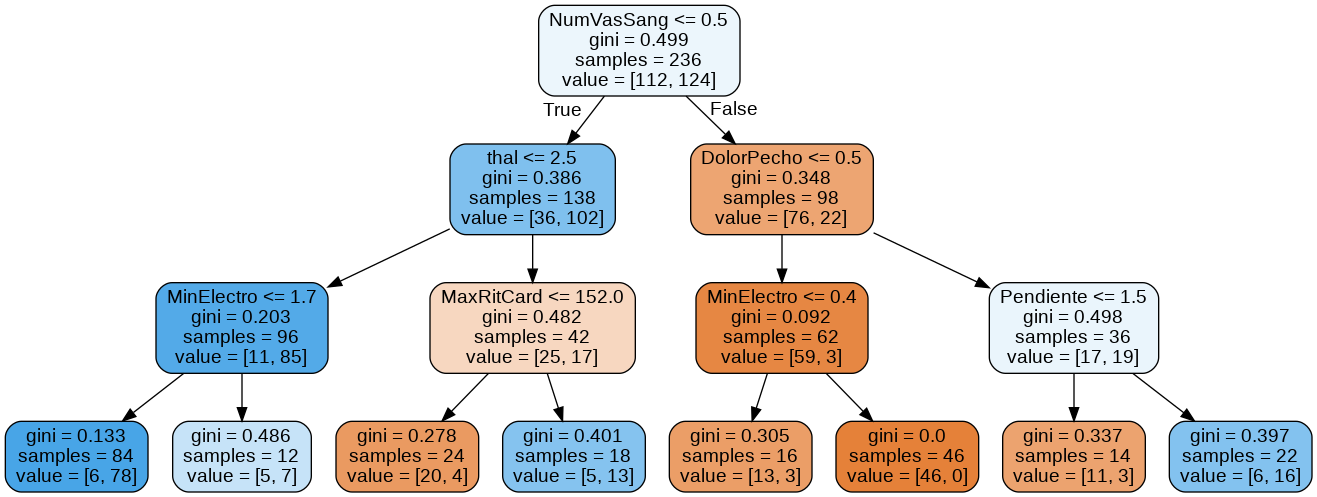

Si nos encontramos con el perfil de un paciente, es posible trazar un camino desde el nodo inicial hasta uno de los nodos finales que nos permitirá clasificar el diagnóstico del paciente.

El value en cada nodo nos dice a cuantos pacientes de ese sample tiene diagnóstico 0 y cuantos 1. Por ejemplo en el primer nodo terminal, value=[6,78] indica que a 6 de los 84 pacientes que caen en ese nodo no se les diagnóstico una enfermedad del corazón y a los otros 78 sí.

 Si nos encontramos en un nodo final azul, el modelo determina que el paciente padece de una enfermedad del corazón, en cambio si es naranja, significa que no tiene enfermedad del corazón. Entre más intenso es el color, mayor es la probabilidad que el diagnóstico sea correcto.

El gini nos indica la pureza del nodo, un valor de 1 indica total desigualdad y 0 igualdad perfecta. En este caso, el sexto nodo final tiene un gini=0.0 lo que indica que a todos los pacientes que caen en ese nodo se les asignó el mismo diagnóstico.

### Máquina de Soporte Vectorial

In [165]:
svm = SVC()
svm.fit(X_train, y_train)
predsvm = svm.predict(X_test)
print("SVM ALgorithm Train Accuracy: {:.2f}%".format(svm.score(X_train,y_train)*100))
print("SVM ALgorithm Test Accuracy: {:.2f}%".format(svm.score(X_test,y_test)*100))
predsvm

SVM ALgorithm Train Accuracy: 69.92%
SVM ALgorithm Test Accuracy: 61.67%


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

Vemos que los accuracy scores son menores a 70% por lo que no podemos decir que este es un buen modelo. La clasificación óptima se realiza maximizando el margen de separación entre las clases. La baja precisión se puede deber a que no hay un margen claro entre los datos de los pacientes que tienen y no una enfermedad en el corazón. Trabajar este modelo pero omitiendo algunas variables podría mejorarlo, pero para este modelo no sabemos cuales son las que podríamos omitir.

### Comparativa de Matrices de Confusión

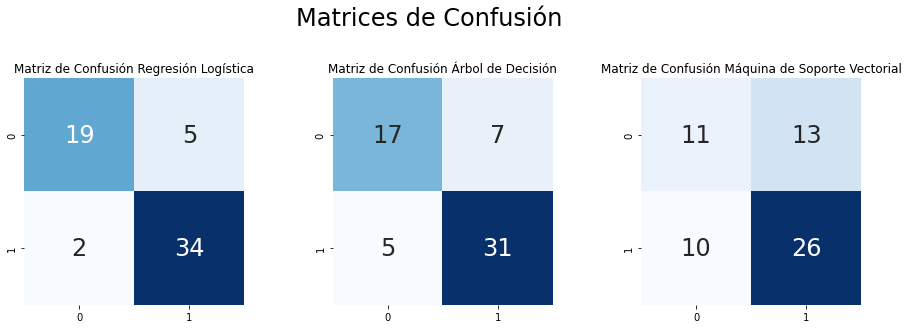

In [160]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,test_pred)
cm_dt = confusion_matrix(y_test,preds)
cm_svm = confusion_matrix(y_test,predsvm)

plt.figure(figsize=(15,10))

plt.suptitle("Matrices de Confusión",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Matriz de Confusión Regresión Logística")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Matriz de Confusión Árbol de Decisión")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Matriz de Confusión Máquina de Soporte Vectorial")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Creamos la matriz de confusión para los tres modelos. Vemos que al utilizar la máquina de soporte vectorial hay más falsos negativos y falsos positivos a compración de los otros dos. La regresión logística es la que clasifica el diagnóstico con mayor precisión (ya que su matriz es la que tiene menos falsos negativos y falsos positivos) pero no significa que el árbol de decisión sea un mal modelo para resolver nuestro objetivo.

Elegimos de estos tres la regresión logística. Ya vimos que para estos datos es una regresión significativa y además es el modelo que clasifica los diagnósticos con mejor precisión. También es más facil observar la influencia de las variables, en este caso, NumVasSang y Sexo son las que tienen los coeficientes mas alejados de cero. Esto significa que estas variables tienen mayor influencia en el modelo. 



### Conclusión

Haciendo uso del modelo de regresión logística, y debido a su alto porcentaje de precisión, se estableció que se puede clasificar con una precisión de 87% la detección de una enfermedad del corazón en un paciente, logrando así el cumplimiento del objetivo principal establecido al inicio del proyecto. Siendo este la clasificación de un diagnostico de alguna posible enfermedad del corazón en un paciente en base a las características obtenidas en los estudios clínicos realizados.

Una técnica utilizada para la búsqueda de una mayor precisión en los modelos fue no usar ciertas variables, se aplicó esto para varias columnas de información, en especial para la regresión logística, dando como resultado una disminución en el porcentaje de precisión ya obtenido. No se hizo un análisis a todas las variables por lo que existe la posibilidad de una mejora con la eliminación de alguna variable no verificada por el equipo.

Otro problema que puede afectar los modelos de regresión y máquina de soporte vectorial es la multicolinealidad. Revisar que no exista multicolinealidad entre variables Xs y en caso de que exista removerlas del modelo puede mejorarlos.

### Recursos

Regresión Logística


*   https://www.kaggle.com/azmainmorshed/logistic-regression-for-beginners
*   https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
*   https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/


Árboles de Decisión



*   https://www.kaggle.com/sbsatter/decision-tree-on-uci-ml-heart-disease
*   https://www.kaggle.com/ashaabrizvi/logisticregression-v-decisiontree-v-randomforest#MODEL-BUILDING



Máquina de Soporte Vectorial



*   https://www.kaggle.com/caesarmario/heart-disease-prediction-w-various-ml-models




Otros Recursos



*   https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning


